In [1]:
import firebase_admin
import re
import math
from firebase_admin import credentials
from firebase_admin import firestore
import matplotlib.pyplot as plt


#Loads firebase credentials
cred = credentials.Certificate("data/key.json")
firebase_admin.initialize_app(cred)

#Initializes Firestore
db = firestore.client()

# Obtain "features" collection
features_ref = db.collection("features").get()

In [2]:
def separate_features_actions():

  #Store the data as readable for analysis
  features = [doc.to_dict() for doc in features_ref]
  actions_count = {}

  # Iterate over the data to separate data in the format needed
  for entry in features:
      feature = entry['feature']
      action = entry['action']

      if feature not in actions_count:
          actions_count[feature] = {'Tap': 0, 'Scroll': 0}
      actions_count[feature][action] += 1

  # Create result
  result = [{'feature': feature, 'action': {'Tap': count['Tap'], 'Scroll': count['Scroll']}} for feature, count in actions_count.items()]

  return result


In [3]:
def normalize_scroll_count(features):
  total_scrolls = sum(entry['action']['Scroll'] for entry in features)

  for entry in features:
      entry['action']['Scroll'] = math.log(entry['action']['Scroll'] + 1) / math.log(total_scrolls + 1) * 15

  return features

In [4]:
def get_interaction_per_feature(features):
  # Calculate total interaction per feature
  for entry in features:
      entry['interaction'] = entry['action']['Tap'] + entry['action']['Scroll']
      del entry['action']  # Remove the action dictionary

  return features

In [5]:
def get_percentage_interaction_per_feature(features):

  get_interaction_per_feature(features)
  # Calculate the total interaction across all features
  total_interaction = sum(entry['interaction'] for entry in features)

  # Calculate the interaction percentage for each feature
  for entry in features:
      entry['interaction_percentage'] = (entry['interaction'] / total_interaction) * 15

  return features


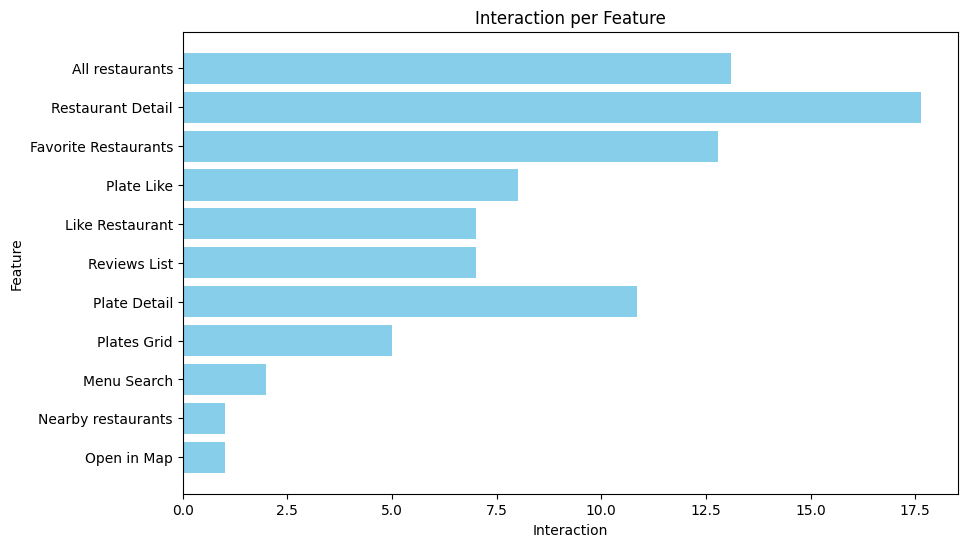

In [8]:
featuresData = separate_features_actions()
featuresData = normalize_scroll_count(featuresData)
features_interaction = get_interaction_per_feature(featuresData)

# Extract features and interactions
features = [entry['feature'] for entry in features_interaction]
interactions = [entry['interaction'] for entry in features_interaction]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, interactions, color='skyblue')
plt.xlabel('Interaction')
plt.ylabel('Feature')
plt.title('Interaction per Feature')
plt.gca().invert_yaxis()  # Invert the y-axis to display features in descending order
plt.show()


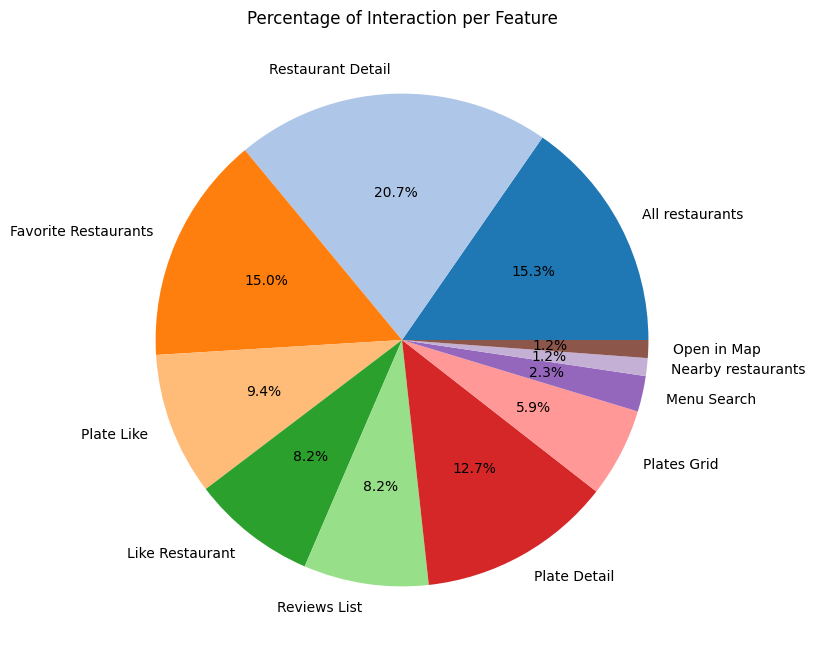

In [9]:
featuresData = separate_features_actions()
featuresData = normalize_scroll_count(featuresData)
features_percentage = get_percentage_interaction_per_feature(featuresData)

# Extract features and interaction percentages
features = [entry['feature'] for entry in features_percentage]
interaction_percentages = [entry['interaction_percentage'] for entry in features_percentage]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(interaction_percentages, labels=features, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Percentage of Interaction per Feature')
plt.show()